In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10

In [2]:
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

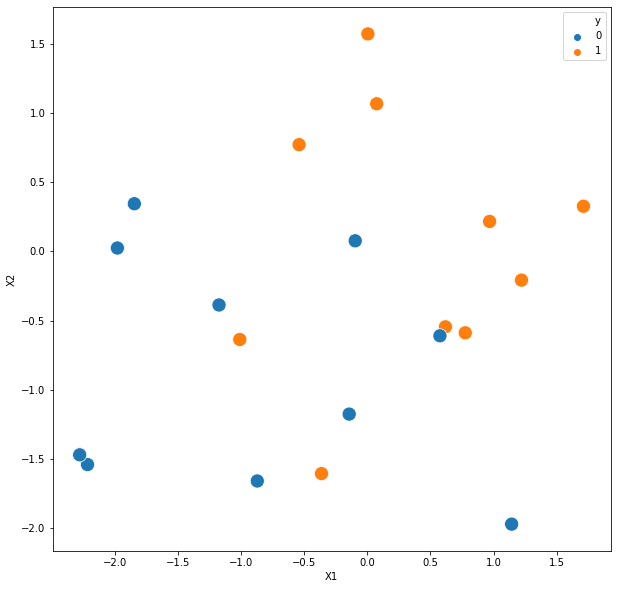

In [67]:
np.random.seed(123456)
X1 = np.random.normal(loc=0.5,size=20).reshape(10,2)
X2 = np.random.normal(loc=-0.5, size=20).reshape(10,2)
X = np.concatenate([X1,X2])
y = np.array([1] * 10 + [0] * 10)
df = pd.DataFrame({'X1': X[:,0], 'X2': X[:,1], 'y': y})
ax = sns.scatterplot(x='X1', y='X2', hue='y', data=df, s=200)

### SVM

In [68]:
s_clf = SVC(C=10, kernel='linear')

In [69]:
s_clf.fit(df[['X1', 'X2']], df['y'])

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
x_min, x_max = X.min(), X.max()

[(-2.276903716971867, 1.7121120250208506)]

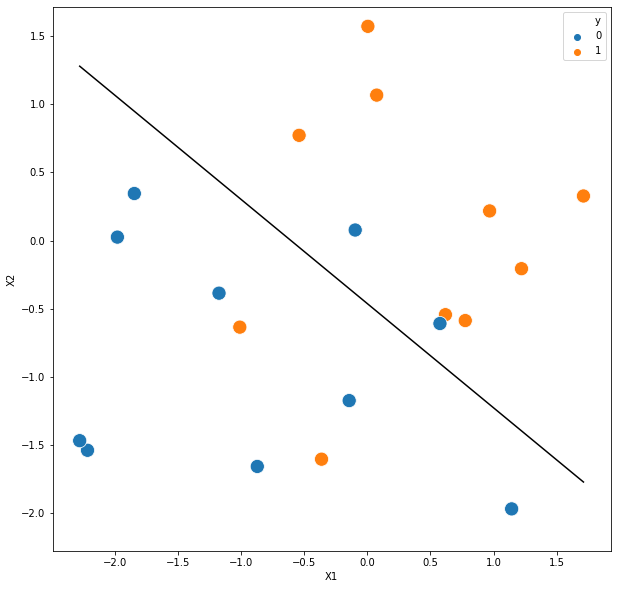

In [71]:
# Plot data points and color using their class
# Create the hyperplane
w = s_clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(x_min, x_max)
yy = a * xx - (s_clf.intercept_[0]) / w[1]

ax = sns.scatterplot(x='X1', y='X2', hue='y', data=df, s=200)
# Plot the hyperplane
sns.lineplot(xx, yy, color='k')
ax.set(ylim=(x_min, x_max))

In [72]:
x_grid = np.linspace(x_min, x_max)
y_grid = np.linspace(x_min, x_max)
# grid_points = np.array([[i, j] for i in x_grid for j in y_grid])
xx, yy = np.meshgrid(x_grid, y_grid)
xy = np.vstack([xx.ravel(), yy.ravel()]).T


In [73]:
y_hat = s_clf.predict(xy)
support_vectors = s_clf.support_vectors_

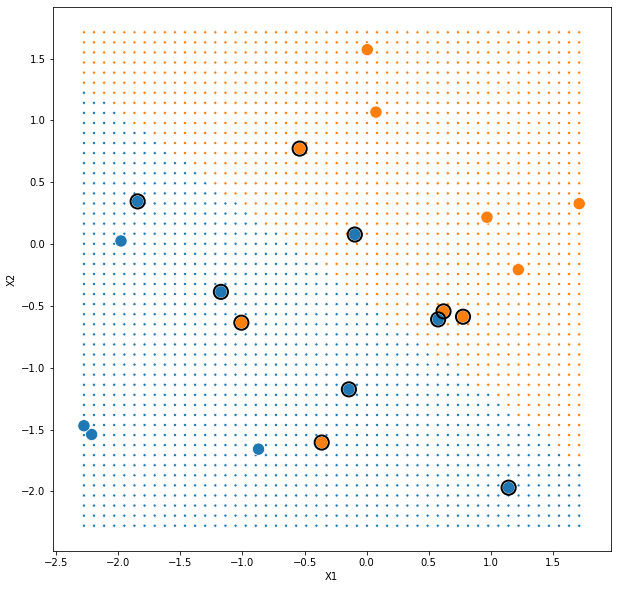

In [74]:
ax = sns.scatterplot(xy[:,0], xy[:,1], hue=y_hat, s=10)
sns.scatterplot(x='X1', y='X2', hue='y', data=df, s=150)
sns.scatterplot(support_vectors[:,0], support_vectors[:,1], s=200, edgecolor='k', facecolors='none', linewidth=2)

ax.legend_.remove()

In [75]:
Z = s_clf.decision_function(xy).reshape(xx.shape)

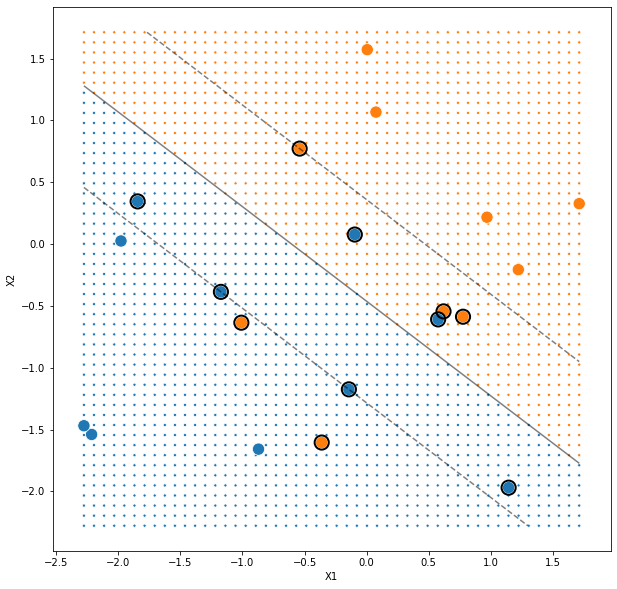

In [76]:
ax = sns.scatterplot(xy[:,0], xy[:,1], hue=y_hat, s=10)
sns.scatterplot(x='X1', y='X2', hue='y', data=df, s=150)
sns.scatterplot(support_vectors[:,0], support_vectors[:,1], s=200, edgecolor='k', facecolors='none', linewidth=2)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.legend_.remove()

## Non-linear SVM

In [77]:
esl_mix = pd.read_csv('data/esl_mix.csv', names=['X1', 'X2', 'y'], skiprows=[0])
# esl_pmix = pd.read_csv('data/esl_pmix.csv', names=['px1'], skiprows=[0])
# esl_pmix2 = pd.read_csv('data/esl_pmix2.csv', names=['px2'], skiprows=[0])

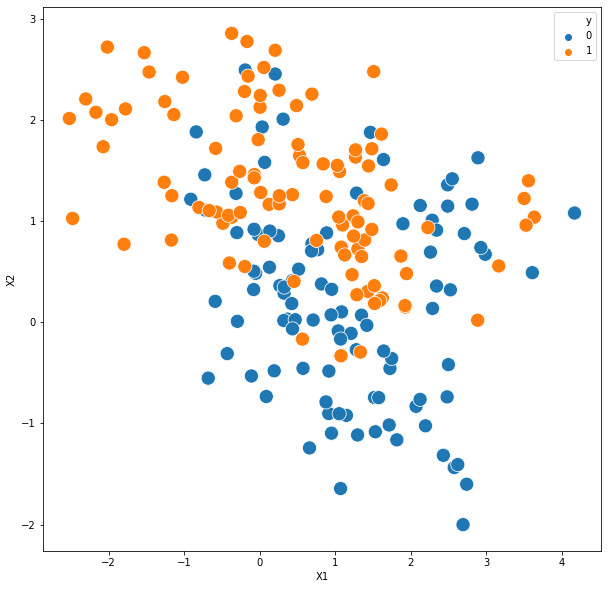

In [78]:
ax = sns.scatterplot(x='X1', y='X2', hue='y', data=esl_mix, s=200)

In [79]:
s_clf = SVC(C=5, kernel='rbf')
s_clf.fit(esl_mix[['X1', 'X2']], esl_mix['y'])

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
x_grid = np.linspace(-2.6, 4.2)
y_grid = np.linspace(-2.6, 4.2)
xx, yy = np.meshgrid(x_grid, y_grid)
xy = np.vstack([xx.ravel(), yy.ravel()]).T

In [81]:
y_hat = s_clf.predict(xy)

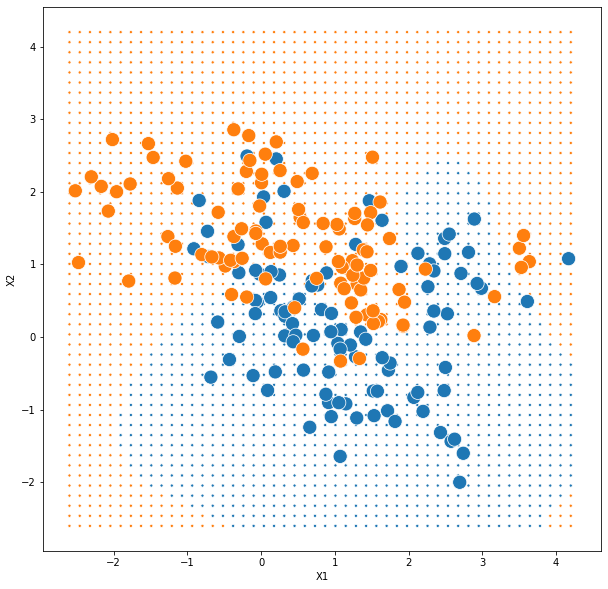

In [82]:
ax = sns.scatterplot(xy[:,0], xy[:,1], hue=y_hat, s=10)
sns.scatterplot(x='X1', y='X2', hue='y', data=esl_mix, s=200)

ax.legend_.remove()

In [83]:
Z = s_clf.decision_function(xy).reshape(xx.shape)

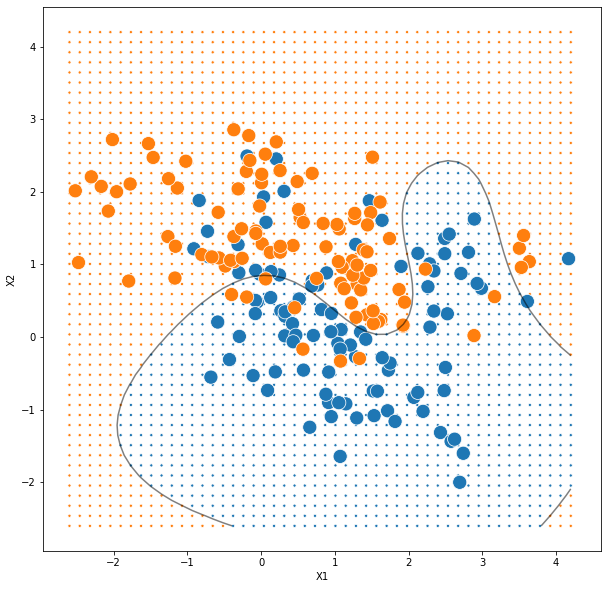

In [86]:
ax = sns.scatterplot(xy[:,0], xy[:,1], hue=y_hat, s=10)
sns.scatterplot(x='X1', y='X2', hue='y', data=esl_mix, s=200)
ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

ax.legend_.remove()